# Clustering
Sometimes we have unlabelled data, but we still want to find some useful representation. This is the kind of tasks we encounter in unsupervised learning. We have already studied Principal Component Analysis (PCA) that is an unsupervised learnin approach that allows to reduce the dimensionality of the data while preserving as much as possible the variance. Today we will see a different unsupervised learning task that is called clustering.
Clustering consists in grouping the instances into K sets or clusters according to their **similarity**. It can be thought as an extreme dimensionality reduction, in which all instances in the same set are represented with the number of the cluster they belong. There are different clustering algorithms and also differen notions of similarity. In the following we will study the most common cases.

## K-Means
K-means is a simple clustering algorithm based on Euclidean Distance. 
It initializes at random k centroids, then iteratively performs two steps until convergence:
- assign each point to the closest centroid:
$$
r_{ik} = \begin{cases}
1 \quad \quad \text{if} \quad k = argmin_j || x_i - \mu_j||^2 \\
0 \quad \quad \text{otherwise}
\end{cases}
$$
- update the centroids $\mu_k$ such that each centroid is the mean of all the points assigned to that centroid
$$
\mu_k = \frac{\sum_n r_{nk}x_n}{\sum_n r_{nk}}
$$
It can be easily verified that this update rule minimizes the following loss function:
$$
J = \sum_{n=1}^N\sum_{k=1}^K r_{nk}||x_n -\mu_k||^2
$$
The [figure](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf) below shows some steps of this algorithm:
<p align="center">
  <img src="../imgs/kmeans.png"/ width=50%>
</p>

The cost function makes the assumption that clusters are convex and isotropic hence it does not perform well when these hypothesis are not respected, let us see some examples:


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### Convex And Isotropic

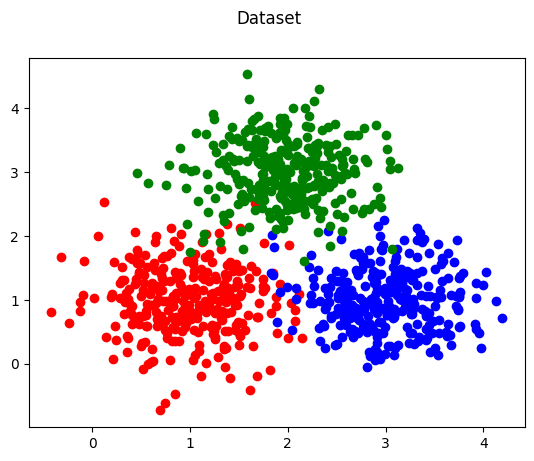

In [13]:
N = 900
K = 3
m1 = [1.,1.]
m2 = [3.,1.]
m3 = [2.,3.]
cov = np.asarray(
    [[.5, .0],
     [.0, .5]])
cov = cov @ np.transpose(cov)
X_1 = np.random.multivariate_normal(mean=m1,cov=cov,size=N//3)
X_2 = np.random.multivariate_normal(mean=m2,cov=cov,size=N//3)
X_3 = np.random.multivariate_normal(mean=m3,cov=cov,size=N//3)
X = np.concatenate([X_1,X_2,X_3],axis=0)

fig,ax = plt.subplots()
ax.scatter(x=X_1[:,0],y=X_1[:,1],c="r")
ax.scatter(x=X_2[:,0],y=X_2[:,1],c="b")
ax.scatter(x=X_3[:,0],y=X_3[:,1],c="g")
fig.suptitle("Dataset")
plt.show()

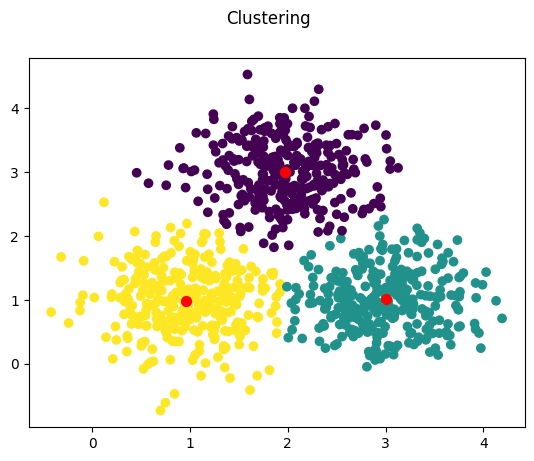

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(X)
fig,ax = plt.subplots()
ax.scatter(X[:,0],X[:,1],c=kmeans.labels_)
ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=50.,c="r")
fig.suptitle("Clustering")
plt.show()


### Convex and Non Isotropic

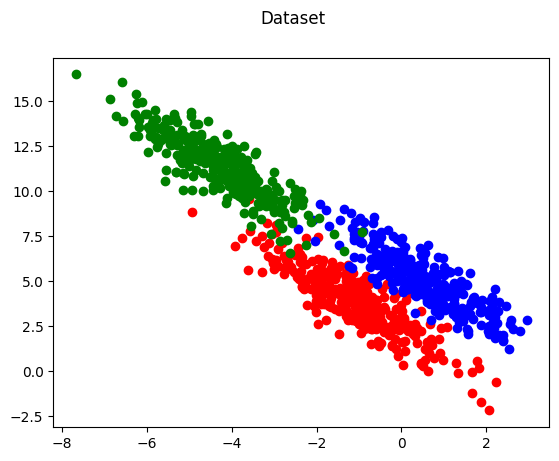

In [15]:
import math
S = np.asanyarray([[1.,0.],
                   [0.,4.]])
Theta = math.pi/6
R = np.asanyarray([[math.cos(Theta), -math.sin(Theta)],
                   [math.sin(Theta),math.cos(Theta)]])
X = R @ S @ X.T
X = X.T
fig,ax = plt.subplots()
ax.scatter(x=X[:N//3,0],y=X[:N//3,1],c="r")
ax.scatter(x=X[N//3:2*(N//3),0],y=X[N//3:2*(N//3),1],c="b")
ax.scatter(x=X[2*(N//3):,0],y=X[2*(N//3):,1],c="g")
fig.suptitle("Dataset")
plt.show()

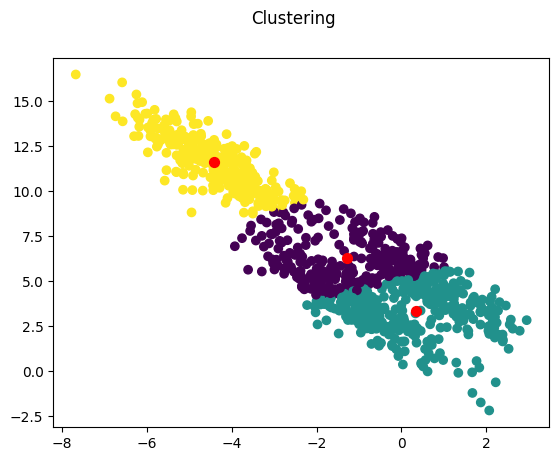

In [16]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(X)
fig,ax = plt.subplots()
ax.scatter(X[:,0],X[:,1],c=kmeans.labels_)
ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=50.,c="r")
fig.suptitle("Clustering")
plt.show()

### Non Convex

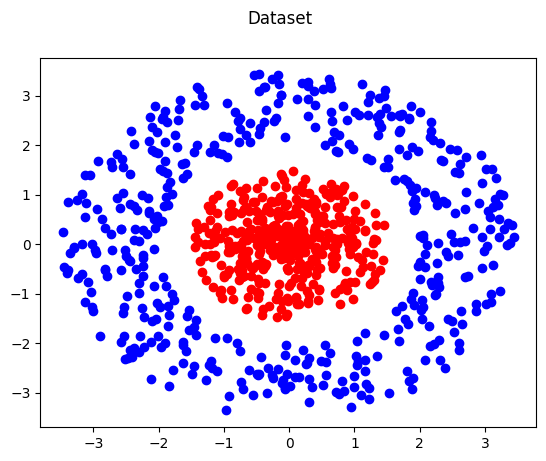

In [17]:
angles = np.random.uniform(0,2*np.pi,size=N//2)
r1 = np.random.uniform(0,1.5,size=N//2)
r2 = np.random.uniform(2,3.5,size=N//2)
X_1 = np.stack([
    r1 * np.cos(angles),
    r1 * np.sin(angles)
],axis=-1)
X_2 = np.stack([
    r2 * np.cos(angles),
    r2 * np.sin(angles)
],axis=-1)
X = np.concatenate([X_1,X_2],axis=0)
fig,ax = plt.subplots()
ax.scatter(x=X_1[:,0],y=X_1[:,1],c="r")
ax.scatter(x=X_2[:,0],y=X_2[:,1],c="b")
fig.suptitle("Dataset")
plt.show()

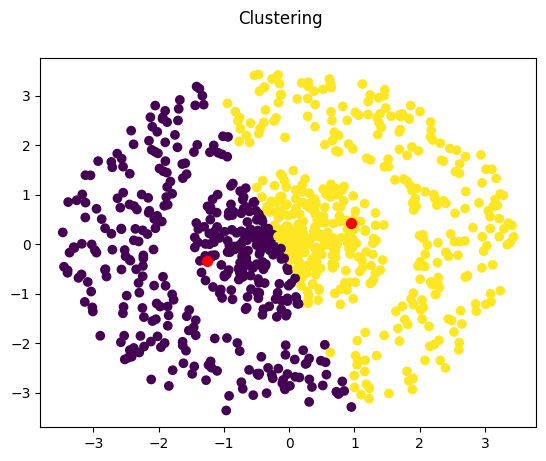

In [18]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)
fig,ax = plt.subplots()
ax.scatter(X[:,0],X[:,1],c=kmeans.labels_)
ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=50.,c="r")
fig.suptitle("Clustering")
plt.show()

## DBSCAN
We have seen that K-means assumes that clusters are convex and isotropic. However there are other clustering algorithms that make different assumptions and can be used when convexity and isotropy are violeted. For example the DBSCAN algorithm assumes that clusters are high density regions separated by low density regions. This algorithm has two parameters: __n__ and $\mathbf{\epsilon}$, where __n__ is the minimum number of samples within radius $\mathbf{\epsilon}$ such that a point can be considered an interior point (or core sample). A cluster is then defined as a set of core samples, each close to each other and a set of non-core samples that are close to a core sample. Any other point that is not a core sample and is at distance at least $\mathbf{\epsilon}$ from any core sample is an outlier and does not belong to any cluster.

From the examples below we can see that this algorithm works when convexity and isotropy are violated, but it does not work when there are low density regions inside a cluster.

### Non convex clusters separated by a low density region

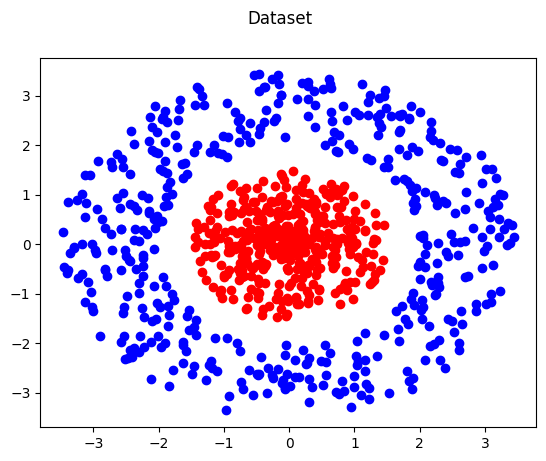

In [19]:
fig,ax = plt.subplots()
ax.scatter(x=X_1[:,0],y=X_1[:,1],c="r")
ax.scatter(x=X_2[:,0],y=X_2[:,1],c="b")
fig.suptitle("Dataset")
plt.show()

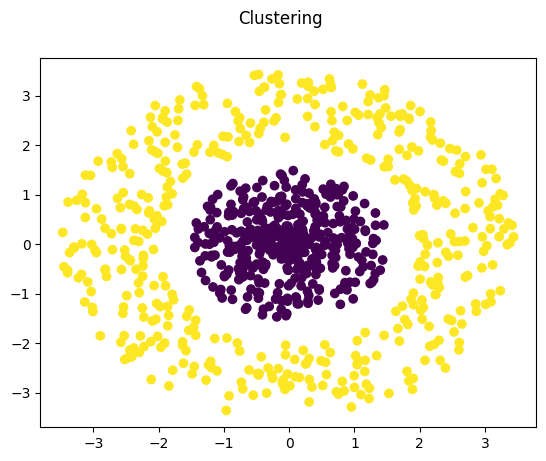

In [20]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5,min_samples=5,metric="euclidean").fit(X)
fig,ax = plt.subplots()
ax.scatter(X[:,0],X[:,1],c=dbscan.labels_)
fig.suptitle("Clustering")
plt.show()

### Non convex clusters where the outer cluster has low density

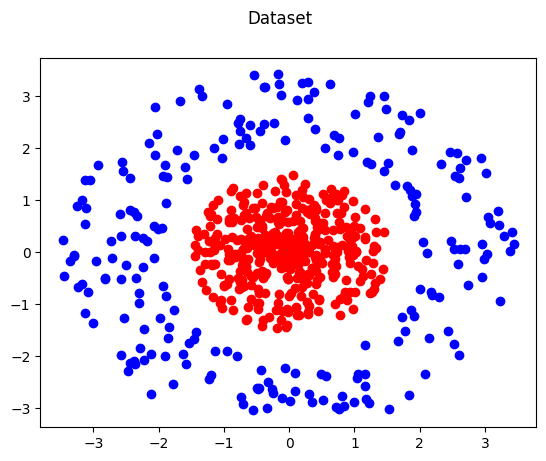

In [21]:
X_2 = X_2[::2,:]
X = np.concatenate([X_1,X_2],axis=0)
fig,ax = plt.subplots()
ax.scatter(x=X_1[:,0],y=X_1[:,1],c="r")
ax.scatter(x=X_2[:,0],y=X_2[:,1],c="b")
fig.suptitle("Dataset")
plt.show()

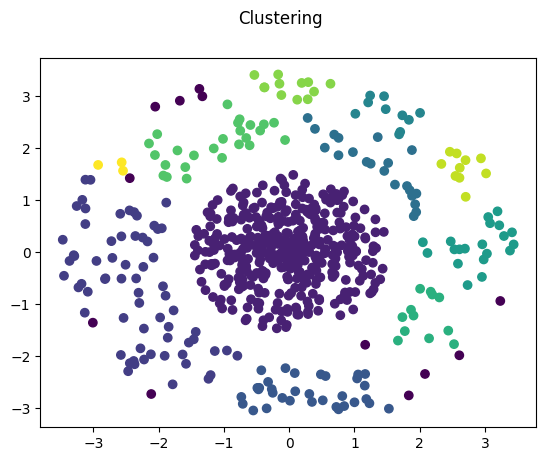

In [22]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5,min_samples=5,metric="euclidean").fit(X)
fig,ax = plt.subplots()
ax.scatter(X[:,0],X[:,1],c=dbscan.labels_)
fig.suptitle("Clustering")
plt.show()

## Hierarchical Clustering
Hierarchical clustering is another family of methods that build a hierarchy of clusters by recursively merging (__bottom up__ or __agglomerative__ clustering) or splitting (__top down__ or __divisive__ clustering) clusters. We will see only agglomerative clustering because it the most used and it is implemented in SKLearn. The algorithm first initializes a cluster for each element then at each iteration it merges two cluster using a greedy rule. The algorithm needs a __distance metric__  that can be specified as a function or a matrix with the pairwise distances and a __measure of dissimilarity__ (or __linkage__) between clusters. When the distance metric is specified as a matrix the algorithm does not need the observations themselves. Both the metric and the linkage influence the result of the clustering, the former determines which objects are most similar, whereas the latter influences the shape of the clusters. 
The most used linkage techniques are:
- Single Linkage
$$
L(A,B) = \min\{ d(x,y) \,|\, x\in A, y\in B\}
$$
- Complete (or Maximum) Linkage:
$$
L(A,B) = \max\{ d(x,y) \,|\, x\in A, y\in B\}
$$
- Average Linkage
$$
L(A,B) = \frac{1}{|A|\cdot |B|} \sum_{x\in A}\sum_{y\in B} d(x,y)
$$
- Ward Linkage, this strategy cannot be generalized to different distance metrics.
$$
L(A,B) = \sum_{x\in A}\sum_{y\in B} ||x-y||^2
$$

The [figure]() below compares the above mentioned linkage strategies for clusters with different shapes:
<p align="center">
  <img src="../imgs/sphx_glr_plot_linkage_comparison_001.png" width=50%>
</p>